In [1]:
!pip install torch torchvision
!pip install detecto

In [2]:
from google.colab import drive
import os
from detecto import core, utils, visualize
from torchvision import transforms

In [5]:
drive.mount('/content/drive')
WORKING_DIRECTORY = '/content/drive/My Drive/final_kruzhok/'
os.chdir(WORKING_DIRECTORY)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('./data/annotations', './data/images', transform=augmentations)
val = core.Dataset('./data/valid', './data/images')
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

lval = core.DataLoader(val, batch_size=1, shuffle=True)
model = core.Model(['kruzhok'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


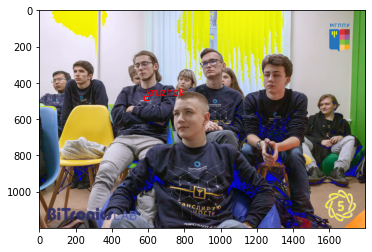

In [11]:
image, targets = val[51]
visualize.show_labeled_image(image, targets['boxes'], targets['labels'])

In [12]:
losses = model.fit(loader, val, verbose=True)

Epoch 1 of 10


/usr/local/lib/python3.6/dist-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


Loss: 0.10449514161680162
Epoch 2 of 10
Loss: 0.08325445050968952
Epoch 3 of 10
Loss: 0.08686018827342495
Epoch 4 of 10
Loss: 0.07490071105127483
Epoch 5 of 10
Loss: 0.07327603084064022
Epoch 6 of 10
Loss: 0.07188708891074375
Epoch 7 of 10
Loss: 0.07125180163756781
Epoch 8 of 10
Loss: 0.0706378866332708
Epoch 9 of 10
Loss: 0.0713656860566938
Epoch 10 of 10
Loss: 0.07074235915446404


In [17]:
for e in os.listdir('./data/valid'):
    image = utils.read_image('./data/valid/' + e)
    labels, boxes, scores = model.predict_top(image)
    visualize.show_labeled_image(image, boxes, labels)

error: ignored

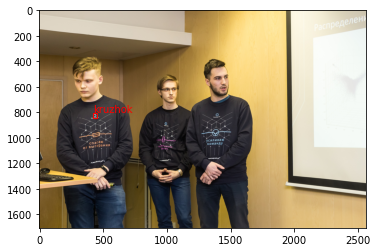

In [ ]:
labels, boxes, scores = model.predict_top(image)
visualize.show_labeled_image(image, boxes, labels)

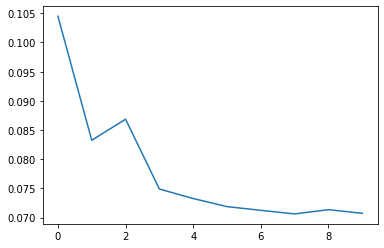

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.show()

In [14]:
model.save('model_weights_augm_new.pth')